<a href="https://colab.research.google.com/github/samarth2411/RelianceStockPricePrediction/blob/main/RELIANCE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
df= pd.DataFrame(pd.read_csv("RELIANCE.csv"))
df.head()

,Date,Open,High,Low,Close,Last,Volume
0,19-01-2015,431.01,438.84,425.34,435.70,435.70,6160000
1,20-01-2015,436.61,448.52,435.30,447.29,447.29,6170000
2,21-01-2015,448.25,451.42,441.84,449.12,449.12,7880000
3,22-01-2015,448.33,449.34,435.62,437.73,437.73,10950000
4,23-01-2015,440.82,444.68,434.38,439.29,439.29,8340000


In [217]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Last,Volume
Date,,,,,,
19-01-2015,431.01,438.84,425.34,435.70,435.70,6160000
20-01-2015,436.61,448.52,435.30,447.29,447.29,6170000
21-01-2015,448.25,451.42,441.84,449.12,449.12,7880000
22-01-2015,448.33,449.34,435.62,437.73,437.73,10950000
23-01-2015,440.82,444.68,434.38,439.29,439.29,8340000


Text(0.5, 1.0, 'Reliance Stock Plot for Overall Period')

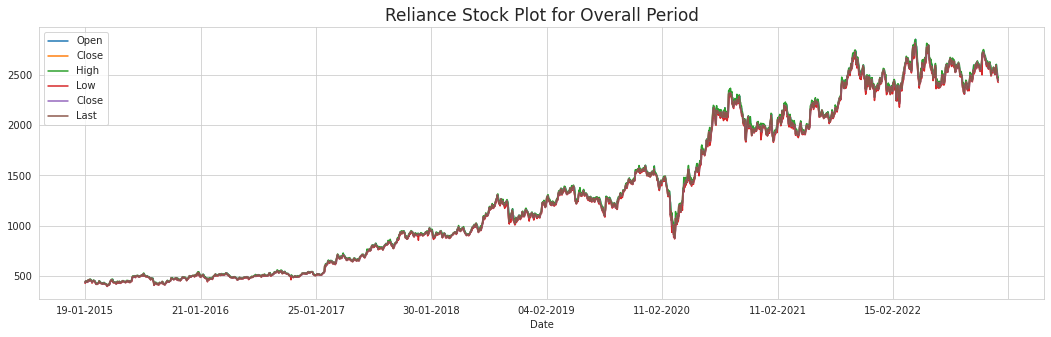

In [218]:
df[['Open', 'Close', 'High','Low','Close','Last']].plot(figsize=(18,5))
plt.title("Reliance Stock Plot for Overall Period", fontsize=17)

In [219]:
a = df.sort_values(by='High',ascending= False).head(5)
a['High']

Date
29-04-2022    2856.15
28-04-2022    2851.00
27-04-2022    2828.00
03-06-2022    2817.35
06-06-2022    2814.00
Name: High, dtype: float64

In [220]:
b = df.sort_values(by='Low',ascending= True).head(5)
b['Low']

Date
30-03-2015    394.49
27-03-2015    396.96
01-04-2015    402.73
24-08-2015    405.16
31-03-2015    405.16
Name: Low, dtype: float64

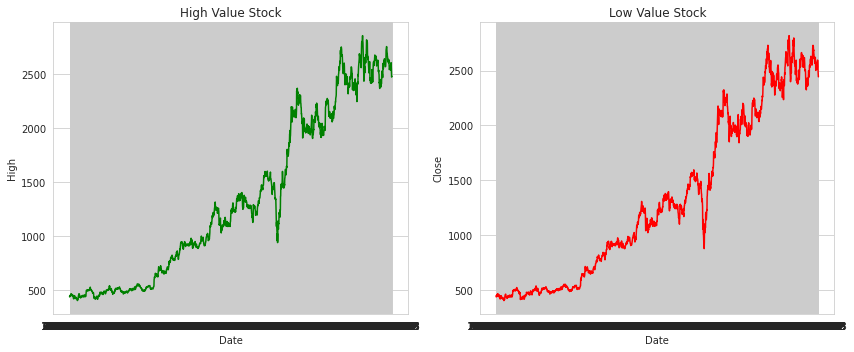

In [222]:
fig,axes= plt.subplots(nrows=1,ncols=2, sharex=True, figsize=(12,5)) 
sns.lineplot(ax= axes[0], y=df['High'],x=df.index, color='green')
axes[0].set_title('High Value Stock')
sns.lineplot(ax= axes[1], y=df['Close'], x=df.index, color='red')
axes[1].set_title('Low Value Stock')
plt.tight_layout()
plt.show()

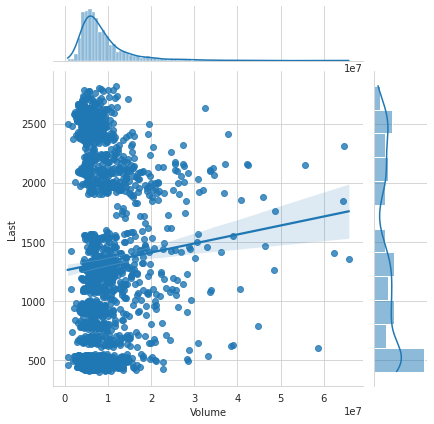

In [223]:
sns.jointplot(x='Volume', y='Last', data=df, kind='reg')

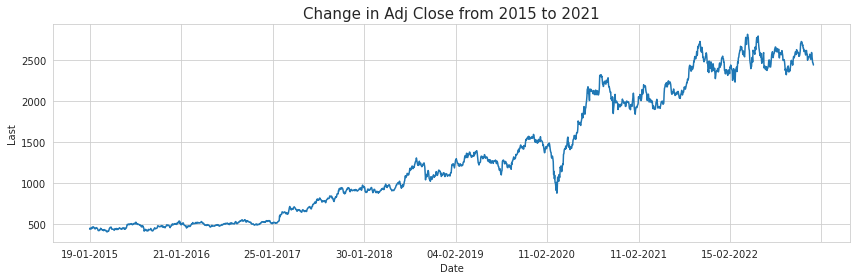

In [224]:
plt.figure(figsize=(12,4))
df['Last'].plot()
plt.xlabel('Date', fontsize= 10)
plt.ylabel('Last',fontsize= 10)
plt.title('Change in Adj Close from 2015 to 2021',fontsize= 15)
plt.tight_layout()

In [225]:
df['Daily_returns'] = df['Last'].pct_change() #Pandas dataframe.pct_change() function calculates the percentage change between the current and a prior element.
df.head()

,Open,High,Low,Close,Last,Volume,Daily_returns
Date,,,,,,,
19-01-2015,431.01,438.84,425.34,435.70,435.70,6160000,NaN
20-01-2015,436.61,448.52,435.30,447.29,447.29,6170000,0.026601
21-01-2015,448.25,451.42,441.84,449.12,449.12,7880000,0.004091
22-01-2015,448.33,449.34,435.62,437.73,437.73,10950000,-0.025361
23-01-2015,440.82,444.68,434.38,439.29,439.29,8340000,0.003564


In [226]:
df[df['Daily_returns']==df['Daily_returns'].max()]['Daily_returns']

Date
25-03-2020    0.147185
Name: Daily_returns, dtype: float64

In [227]:
df[df['Daily_returns']==df['Daily_returns'].min()]['Daily_returns']

Date
23-03-2020   -0.131536
Name: Daily_returns, dtype: float64

Text(0.5, 1.0, 'Reliance Stock Daily Returns')

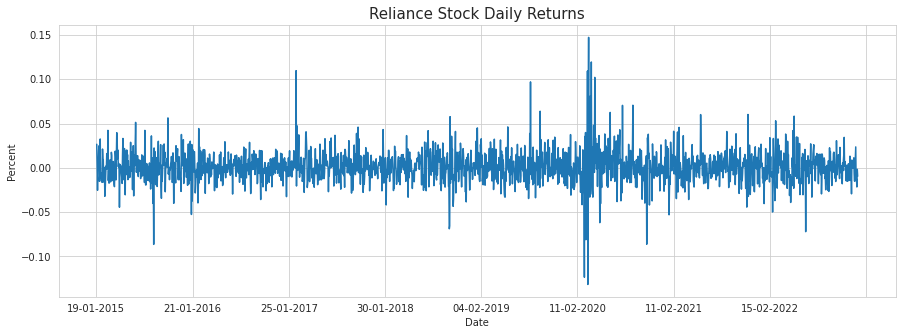

In [228]:
plt.figure(figsize=(15,5))
df['Daily_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Reliance Stock Daily Returns",fontsize= 15 )

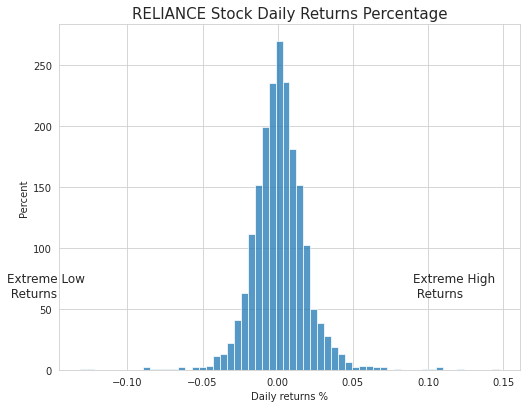

In [229]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= df['Daily_returns'], bins=60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("RELIANCE Stock Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.18,60,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.09,60,"Extreme High\n Returns", fontsize= 12)
plt.show()

In [230]:
df['Cum_returns']= (df['Daily_returns']+1).cumprod()
df.head()

,Open,High,Low,Close,Last,Volume,Daily_returns,Cum_returns
Date,,,,,,,,
19-01-2015,431.01,438.84,425.34,435.70,435.70,6160000,NaN,NaN
20-01-2015,436.61,448.52,435.30,447.29,447.29,6170000,0.026601,1.026601
21-01-2015,448.25,451.42,441.84,449.12,449.12,7880000,0.004091,1.030801
22-01-2015,448.33,449.34,435.62,437.73,437.73,10950000,-0.025361,1.004659
23-01-2015,440.82,444.68,434.38,439.29,439.29,8340000,0.003564,1.008240


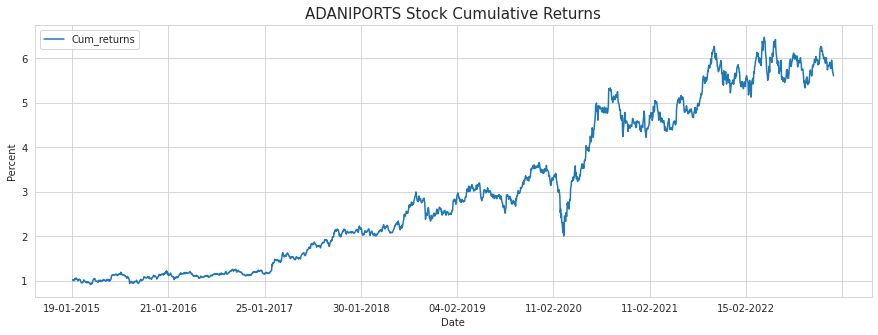

In [231]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
df['Cum_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("RELIANCE Stock Cumulative Returns",fontsize= 15 )
plt.legend()

In [ ]:
# sns.set_style('whitegrid')
# f= plt.figure(figsize=(12,5))
# df['Close'].loc['2019-01-01': '2019-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
# df['Close'].loc['2019-01-01':'2019-12-31'].plot(label='CLOSE price')
# plt.title(" Comparison of the moving average & Close price for the year 2008", fontsize=17)
# plt.legend()

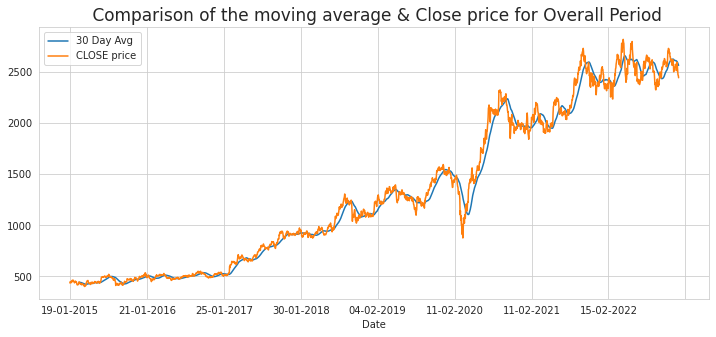

In [232]:
f= plt.figure(figsize=(12,5))
df['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close'].plot(label='CLOSE price')
plt.title(" Comparison of the moving average & Close price for Overall Period", fontsize=17)
plt.legend()

#TRAIN AND TEST DATA


In [233]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [234]:
X= df[['Open', 'High', 'Low', 'Close', 'Volume']]
y= df['Last']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [235]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [236]:
model = RandomForestRegressor(n_estimators=500, random_state=42, max_depth=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

[ 484.37915202  431.9787627   489.04966604  497.12566536  831.62625333
 1237.44406837  539.11068027  510.13639603  452.94533533  501.40979622
 1087.8247919  1993.74695356  613.38569     814.36734467 2562.90850857
  527.34351298 2308.21103    1413.0283401   798.99995633 1279.57373118
 1984.55779256 2378.43259487 1141.38960936  420.4880339   453.55641667
 2776.3315      508.73109075 1972.53921722 1086.29298462 1215.09497848
 1549.46766264 2354.04689167  912.20509933 1516.51789852 2694.71395
  423.05805031 1067.1616881  2598.38578056  449.93764257 1938.28318104
 2530.61051786  478.58780102 1089.41644687  503.73841739 1125.29922071
  442.72505577 2412.98870167 2523.90477119 1091.89345599  510.25483454
 2529.48112452 2327.73475     491.74834072 1462.11285669 1348.49721138
  468.26166267 2578.56815357 1129.20245405  409.67687833 1486.218165
 2107.29658204  962.85034116 1262.45679206 2117.37283595  777.87822276
  912.32803184 2537.56173833 2519.59008226 1510.17904338  501.52839655
 1297.79403

In [237]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 1.716
Mean Squared Error: 14.9976
Root Mean Squared Error: 3.8727
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.
Accuracy: 99.86 %.


In [239]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")


onemonth_df = pd.DataFrame(predictions[:21])
onemonth_df.to_csv("one-month-predictions.csv")



In [240]:
print(predictions)

            Predictions
2023-01-16   484.379152
2023-01-17   431.978763
2023-01-18   489.049666
2023-01-19   497.125665
2023-01-20   831.626253
...                 ...
2024-08-27  2578.043730
2024-08-28  1445.844115
2024-08-29   536.221399
2024-08-30  1859.131192
2024-08-31   498.362007

[594 rows x 1 columns]


Buy price and date
   Unnamed: 0  Predictions
1  2023-01-17   431.978763 

Sell price and date
    Unnamed: 0  Predictions
14  2023-01-30  2562.908509


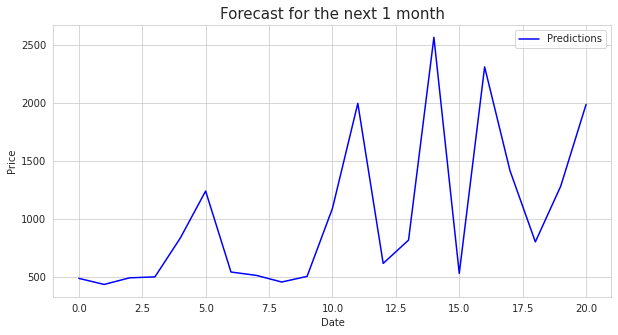

In [241]:
onemonth_df_pred = pd.read_csv("one-month-predictions.csv")
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(onemonth_buy,'\n')
print("Sell price and date")
print(onemonth_sell)
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), color="blue")
plt.title("Forecast for the next 1 month", size=15)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()